#HW2 Problem:  Multivariate Normal Distributions

Specification of the Problem:

You are given a tabular dataset containing feature values $X$ and classes $\boldsymbol{y}$,
where the $y$ values are integers between 1 and $k$ (so $k$ is the number of classes).

(1) Derive the Gaussian/Multivariate Normal Distribution parameters for each class.

(2) For each row $\boldsymbol{x}_i$ in the $X$ matrix,
compute its Gaussian distance to each of the $k$ MVNs
(using the Gaussian pdf / likelihood function).
If $j_{min}$ is this closest class, and is different from $y_i$, print $i$, $j_{min}$, and $y_i$.

More specifically, develop a program that reads in a single numeric table from stdin.
The last column is $\boldsymbol{y}$, and the columns before this define a matrix $X$.
Your program should identify rows in the dataset that are "misclassified" by $\boldsymbol{y}$,
and print out information about these rows.

For example, with the <b>iris</b> dataset, the $\boldsymbol{x}_i$ rows
for $i =$ 33, 47, and 58 have this property.
So your program should print the following:

<pre>
51 3 2 
53 3 2 
58 1 2 
60 1 2 
61 1 2 
77 3 2 
78 3 2 
80 1 2 
81 1 2 
82 1 2 
87 3 2 
94 1 2 
99 1 2 
102 2 3 
107 2 3 
114 2 3 
115 2 3 
120 2 3 
122 2 3 
124 2 3 
127 2 3 
128 2 3 
139 2 3 
143 2 3 
147 2 3 
150 2 3 
</pre>

The three columns of this output represent the $i$, $j_{min}$, and $y_i$ values mentioned above.


In [46]:
### %load_ext rmagic
### import rpy2 as Rpy

%load_ext rpy2.ipython

# new feature -- ipython is now part of rpy2.

##Multivariate Normal Distributions

We can define a $p$-dimensional Gaussian function in the following way.
Let $X$ be a $n \times p$ matrix of (normally-distributed) feature values,
whose $p \times p$ covariance matrix is $\Sigma$,
and whose column means are in the vector ${\boldsymbol{\mu}}$.

Assuming that $\boldsymbol{x}$ represent a $p$-dimensional value,
then a $p$-dimensional MVN (multivariate normal distribution) is

$$
g({\boldsymbol{x}}, {\boldsymbol{\mu}}, \Sigma) ~~=~~
\frac{1}{{(2\,\pi)}^{p/2}} ~
\frac{1}{\sqrt{\det\,\Sigma}} ~
\exp\left({ \, -\frac{1}{2} \;
{\,({\boldsymbol{x}}-{\boldsymbol{\mu}})'}
\; \Sigma^{-1} \,
{\,({\boldsymbol{x}}-{\boldsymbol{\mu}})}
 \, }\right) .
$$

Because $\Sigma$ is a covariance matrix, it is nonnegative definite (its determinant is nonnegative and the square root is defined).

##Sample covariance matrix and 4D MVN for the iris data

In [37]:
%%R -w 600 -h 600


data(iris)

X = as.matrix(iris[, 1:4])
means  = apply(X, 2, mean)
sigmas = apply(X, 2, sd)
n = dim(X)[1]
p = dim(X)[2]

k = length(unique(iris$Species))  # number of classes

species_class_number = unclass(iris$Species)
iris_colors = c("red","green","blue")

y = species_class_number


Sigma = cov(X)  # covariance matrix
detSigma = det(Sigma)

SigmaInverse = solve(Sigma)    #  This is R's way to compute:  inverse(Sigma)

cat("\n\ncovariance matrix:\n\n")
print(Sigma)

cat("\n\ninverse covariance matrix\n\n")
print(SigmaInverse)

cat("\n\ncorrelation matrix for the Iris data:\n\n")

print( cor(iris[,1:4]) )





covariance matrix:

             Sepal.Length Sepal.Width Petal.Length Petal.Width
Sepal.Length    0.6856935  -0.0424340    1.2743154   0.5162707
Sepal.Width    -0.0424340   0.1899794   -0.3296564  -0.1216394
Petal.Length    1.2743154  -0.3296564    3.1162779   1.2956094
Petal.Width     0.5162707  -0.1216394    1.2956094   0.5810063


inverse covariance matrix

             Sepal.Length Sepal.Width Petal.Length Petal.Width
Sepal.Length    10.314699   -6.713189    -7.314483    5.739951
Sepal.Width     -6.713189   11.058417     6.480589   -6.170932
Petal.Length    -7.314483    6.480589    10.031679  -14.513767
Petal.Width      5.739951   -6.170932   -14.513767   27.693635


correlation matrix for the Iris data:

             Sepal.Length Sepal.Width Petal.Length Petal.Width
Sepal.Length    1.0000000  -0.1175698    0.8717538   0.8179411
Sepal.Width    -0.1175698   1.0000000   -0.4284401  -0.3661259
Petal.Length    0.8717538  -0.4284401    1.0000000   0.9628654
Petal.Width     0.8179411 



covariance matrix:

             Sepal.Length Sepal.Width Petal.Length Petal.Width
Sepal.Length    0.6856935  -0.0424340    1.2743154   0.5162707
Sepal.Width    -0.0424340   0.1899794   -0.3296564  -0.1216394
Petal.Length    1.2743154  -0.3296564    3.1162779   1.2956094
Petal.Width     0.5162707  -0.1216394    1.2956094   0.5810063


inverse covariance matrix

             Sepal.Length Sepal.Width Petal.Length Petal.Width
Sepal.Length    10.314699   -6.713189    -7.314483    5.739951
Sepal.Width     -6.713189   11.058417     6.480589   -6.170932
Petal.Length    -7.314483    6.480589    10.031679  -14.513767
Petal.Width      5.739951   -6.170932   -14.513767   27.693635


correlation matrix for the Iris data:

             Sepal.Length Sepal.Width Petal.Length Petal.Width
Sepal.Length    1.0000000  -0.1175698    0.8717538   0.8179411
Sepal.Width    -0.1175698   1.0000000   -0.4284401  -0.3661259
Petal.Length    0.8717538  -0.4284401    1.0000000   0.9628654
Petal.Width     0.8179411 

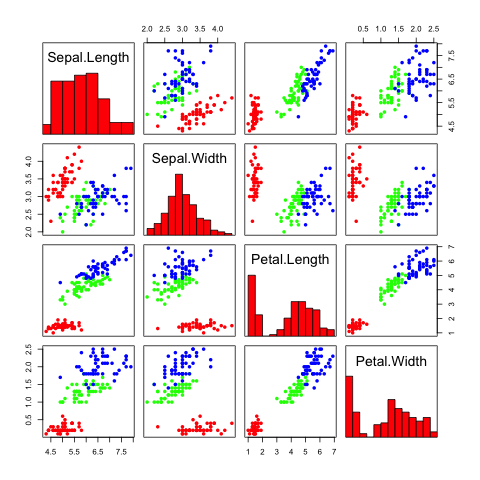

In [38]:
%%R

Sigma = cov(X)  # covariance matrix
detSigma = det(Sigma)

SigmaInverse = solve(Sigma)    #  R's way to compute:  inverse(Sigma)

cat("\n\ncovariance matrix:\n\n")
print(Sigma)

cat("\n\ninverse covariance matrix\n\n")
print(SigmaInverse)

cat("\n\ncorrelation matrix for the Iris data:\n\n")

print( cor(iris[,1:4]) )

cat("\n\nthe correlation matrix for the Iris data summarizes the slopes of pairwise plots\n\n")

panel.hist = function(x, ...)
{
    usr <- par("usr"); on.exit(par(usr))
    par(usr = c(usr[1:2], 0, 1.5) )
    h <- hist(x, plot = FALSE)
    breaks <- h$breaks; nB <- length(breaks)
    hy <- h$counts; hy <- hy/max(hy)
    rect(breaks[-nB], 0, breaks[-1], hy, ...)
}

pairs(X, col=iris_colors[y], pch=16, diag.panel = panel.hist )


##The Gaussian pdf as a function

$$
g({\boldsymbol{x}}, {\boldsymbol{\mu}}, \Sigma) ~~=~~
\frac{1}{{(2\,\pi)}^{p/2}} ~
\frac{1}{\sqrt{\det\,\Sigma}} ~
\exp\left({ \, -\frac{1}{2} \;
{\,({\boldsymbol{x}}-{\boldsymbol{\mu}})'}
\; \Sigma^{-1} \,
{\,({\boldsymbol{x}}-{\boldsymbol{\mu}})}
 \, }\right) .
$$


In [39]:
%%R

g = function(xvec, meanvec, inverseCovMatrix) {
     1 / sqrt(2*pi)^2 / sqrt(detSigma) *
         exp( -1/2 * ( t(xvec-meanvec) %*% inverseCovMatrix %*% (xvec-meanvec) )[1,1] )
}


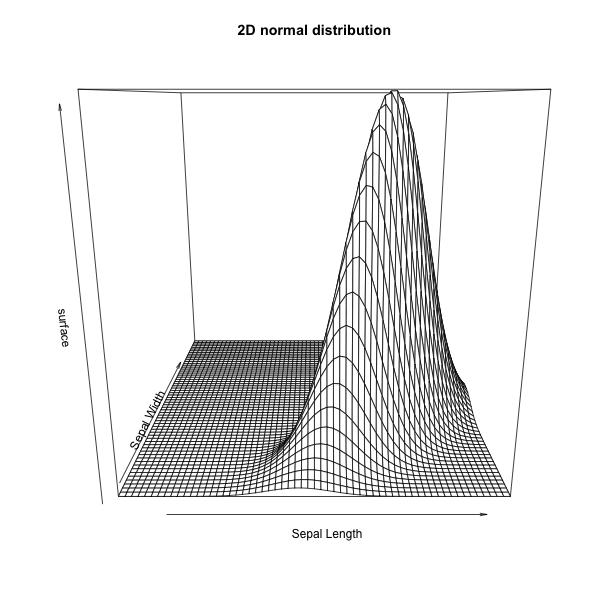

In [40]:
%%R -w 600 -h 600

# generate a surface, filled with heights of a 2D Gaussian/MVN
# using columns 1 and 2 (the Sepal Length and Sepal Width columns)

nvalues = 61
x_grid_values = seq(-3,3, length=nvalues) * sigmas[1] + means[1]
y_grid_values = seq(-3,3, length=nvalues) * sigmas[2] + means[2]

surface = matrix(0, nvalues, nvalues)
for (i in 1:nvalues) {
   for (j in 1:nvalues) {

       surface[i,j]  =  g( c(x_grid_values[i],y_grid_values[j]), means, SigmaInverse )
       
   }
}

# plot the 2D Gaussian ("bi-variate normal distribution")

persp(surface, x=x_grid_values, y=y_grid_values, main="2D normal distribution",
       xlab="Sepal Length", ylab="Sepal Width")

## Contour maps

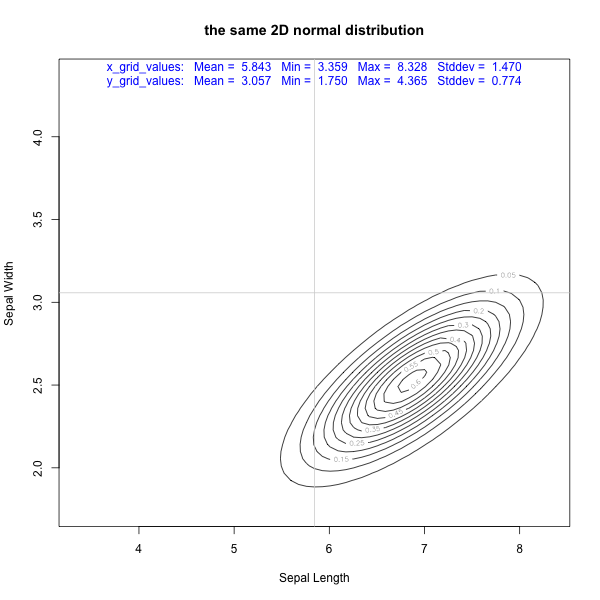

In [41]:
%%R -w 600 -h 600

contour(surface, x=x_grid_values, y=y_grid_values, main="the same 2D normal distribution",
       xlab="Sepal Length", ylab="Sepal Width")

annotate_plot_with_parameters = function(x, line=0, ...) {
 mtext(sprintf("%s:   Mean = %6.3f   Min = %6.3f   Max = %6.3f   Stddev = %6.3f",
  paste(deparse(substitute(x))),
    # R uses call by name;  this incantation obtains the input expression as a string
  mean(x),min(x),max(x),sd(x)), line=line, col="blue", ...)
}

annotate_plot_with_parameters(x_grid_values,-1)
annotate_plot_with_parameters(y_grid_values,-2)

abline(v=mean(x_grid_values),col="lightgray")
abline(h=mean(y_grid_values),col="lightgray")



In [42]:
%%R

# print summary statistics for each kind of iris

print( by( iris[,1:4], iris[,5], summary ) )

## equivalently:
# print( by( X, y, summary ) )

# notice that the Mean values in these summaries give the centroids of each cluster/MVN


iris[, 5]: setosa
  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.300   Min.   :1.000   Min.   :0.100  
 1st Qu.:4.800   1st Qu.:3.200   1st Qu.:1.400   1st Qu.:0.200  
 Median :5.000   Median :3.400   Median :1.500   Median :0.200  
 Mean   :5.006   Mean   :3.428   Mean   :1.462   Mean   :0.246  
 3rd Qu.:5.200   3rd Qu.:3.675   3rd Qu.:1.575   3rd Qu.:0.300  
 Max.   :5.800   Max.   :4.400   Max.   :1.900   Max.   :0.600  
------------------------------------------------------------ 
iris[, 5]: versicolor
  Sepal.Length    Sepal.Width     Petal.Length   Petal.Width   
 Min.   :4.900   Min.   :2.000   Min.   :3.00   Min.   :1.000  
 1st Qu.:5.600   1st Qu.:2.525   1st Qu.:4.00   1st Qu.:1.200  
 Median :5.900   Median :2.800   Median :4.35   Median :1.300  
 Mean   :5.936   Mean   :2.770   Mean   :4.26   Mean   :1.326  
 3rd Qu.:6.300   3rd Qu.:3.000   3rd Qu.:4.60   3rd Qu.:1.500  
 Max.   :7.000   Max.   :3.400   Max.   :5.10   Max.   :1.8

##Print mean vectors and covariance matrices for each class

In [43]:
%%R

for (j in 1:k) {
   Data_for_j_th_class = subset(X, (y==j) )
   mean_vector = matrix( apply(Data_for_j_th_class, 2, mean), nrow=p, ncol=1 )  # column vector
   cov_matrix = cov(Data_for_j_th_class)
   print( as.character(unique(iris$Species))[j] )
   print( mean_vector )
   print( cov_matrix )
}

[1] "setosa"
      [,1]
[1,] 5.006
[2,] 3.428
[3,] 1.462
[4,] 0.246
             Sepal.Length Sepal.Width Petal.Length Petal.Width
Sepal.Length   0.12424898 0.099216327  0.016355102 0.010330612
Sepal.Width    0.09921633 0.143689796  0.011697959 0.009297959
Petal.Length   0.01635510 0.011697959  0.030159184 0.006069388
Petal.Width    0.01033061 0.009297959  0.006069388 0.011106122
[1] "versicolor"
      [,1]
[1,] 5.936
[2,] 2.770
[3,] 4.260
[4,] 1.326
             Sepal.Length Sepal.Width Petal.Length Petal.Width
Sepal.Length   0.26643265  0.08518367   0.18289796  0.05577959
Sepal.Width    0.08518367  0.09846939   0.08265306  0.04120408
Petal.Length   0.18289796  0.08265306   0.22081633  0.07310204
Petal.Width    0.05577959  0.04120408   0.07310204  0.03910612
[1] "virginica"
      [,1]
[1,] 6.588
[2,] 2.974
[3,] 5.552
[4,] 2.026
             Sepal.Length Sepal.Width Petal.Length Petal.Width
Sepal.Length   0.40434286  0.09376327   0.30328980  0.04909388
Sepal.Width    0.09376327  0.1040

In [44]:
%%R

# load ggplot2, an important graphics/visualization package

not.installed <- function(pkg) !is.element(pkg, installed.packages()[,1])

if (not.installed("ggplot2"))  install.packages("ggplot2")  # we need the ggplot2 package

library(ggplot2)

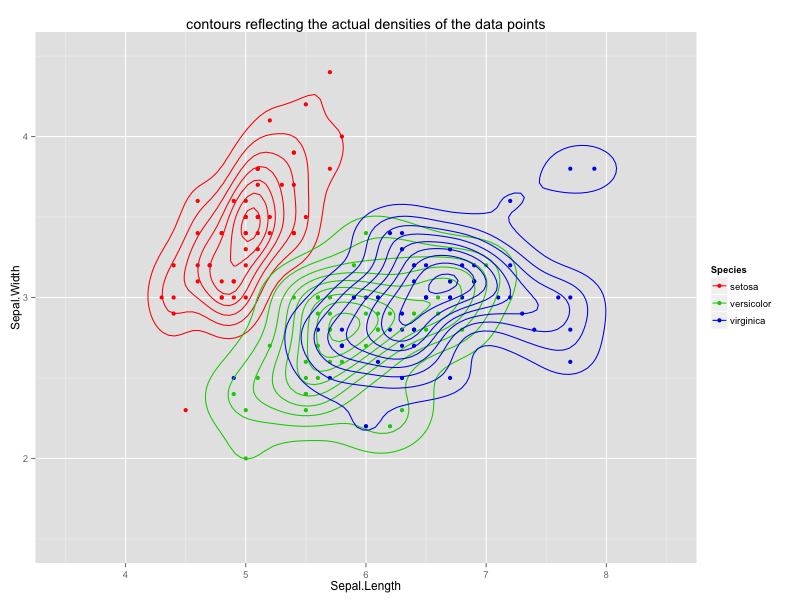

In [45]:
%%R -w 800 -h 600

m = ggplot(iris, aes(x = Sepal.Length, y = Sepal.Width, color = Species))
m = m + xlim(3.5,8.5) + ylim(1.5,4.5) + geom_point() + geom_density2d()
m = m + scale_color_manual(values=c( setosa="red", versicolor="green3", virginica="blue2" ))
m = m + ggtitle("contours reflecting the actual densities of the data points")
print(m)

##That's it!  Now just write an R script that finds the closest MVNs for any dataset it reads in.

To get you started, your R script can be an extension of this outline:

<pre>
#  Read in a table (in csv format) from standard input:

Table = data.matrix(read.csv( file="stdin", header=TRUE ))

X = Table[, 1:(ncol(Table)-1) ]
classifications = Table[, ncol(Table) ]
k = length(unique(classifications))  #  k is the number of different classifications

y = unclass(classifications)         # convert the class values into numeric indices

n = nrow(X)
p = ncol(X)

distance_value = matrix(0, nrow=n, ncol=k)  # matrix to record distance values

# ... For each class j from 1 to k
# ...    Derive the MVN distribution parameters for the j-th class.
# ...    For each row x[i,] in the X matrix,
# ...       distance_value[i,j] = the Gaussian distance_value of x[i,] to class j 
# ...           (using a function like g(), defined above).
# ...
# ... For each row x[i,] in the X matrix,
# ...    If jmin is the number of this closest class and is different from y[i],
# ...    print i, jmin, and y[i].
</pre>


#What your program's output should look like

For example, with the <b>iris</b> dataset, the $\boldsymbol{x}_i$ rows
for $i =$ 33, 47, and 58 have this property.
So your program should print the following:

<pre>
51 3 2 
53 3 2 
58 1 2 
60 1 2 
61 1 2 
77 3 2 
78 3 2 
80 1 2 
81 1 2 
82 1 2 
87 3 2 
94 1 2 
99 1 2 
102 2 3 
107 2 3 
114 2 3 
115 2 3 
120 2 3 
122 2 3 
124 2 3 
127 2 3 
128 2 3 
139 2 3 
143 2 3 
147 2 3 
150 2 3 
</pre>

The three columns of this output represent the $i$, $j_{min}$, and $y_i$ values,
where $j_{min}$ is the number of the class to which $\boldsymbol{x}_i$ is closest.
